In [1]:
from IPython.display import Image

# 문제

* 게임 캐릭터를 4가지 명령어를 통해 움직이려 합니다. 명령어는 다음과 같습니다.
</br></br>
    * U: 위쪽으로 한 칸 가기
    * D: 아래쪽으로 한 칸 가기
    * R: 오른쪽으로 한 칸 가기
    * L: 왼쪽으로 한 칸 가기

* 캐릭터는 좌표평면의 (0, 0) 위치에서 시작합니다. 좌표평면의 경계는 왼쪽 위(-5, 5), 왼쪽 아래(-5, -5), 오른쪽 위(5, 5), 오른쪽 아래(5, -5)로 이루어져 있습니다.

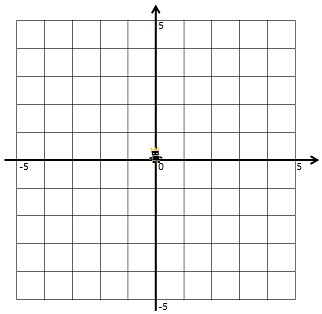

In [2]:
Image('../../../image/pic1.png')

* 예를 들어, "ULURRDLLU"로 명령했다면

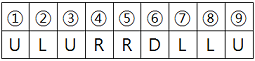

In [3]:
Image('../../../image/pic2.png')

 * 1번 명령어부터 7번 명령어까지 다음과 같이 움직입니다.

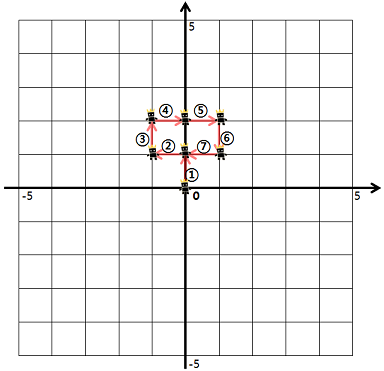

In [4]:
Image('../../../image/pic3.png')

* 8번 명령어부터 9번 명령어까지 다음과 같이 움직입니다.

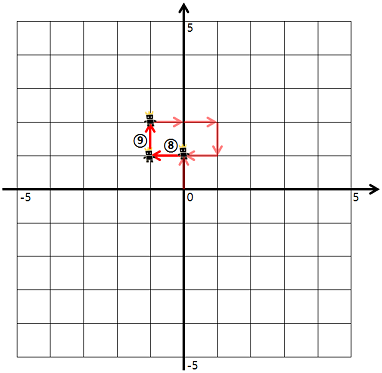

In [5]:
Image('../../../image/pic4.png')

* 이때, 우리는 게임 캐릭터가 지나간 길 중 캐릭터가 처음 걸어본 길의 길이를 구하려고 합니다. 예를 들어 위의 예시에서 게임 캐릭터가 움직인 길이는 9이지만, 캐릭터가 처음 걸어본 길의 길이는 7이 됩니다. (8, 9번 명령어에서 움직인 길은 2, 3번 명령어에서 이미 거쳐 간 길입니다)
* 단, 좌표평면의 경계를 넘어가는 명령어는 무시합니다.

* 예를 들어, "LULLLLLLU"로 명령했다면

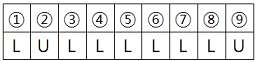

In [6]:
Image('../../../image/pic5.png')

* 1번 명령어부터 6번 명령어대로 움직인 후, 7, 8번 명령어는 무시합니다. 다시 9번 명령어대로 움직입니다.

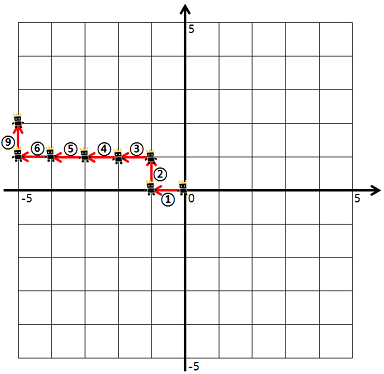

In [7]:
Image('../../../image/pic6.png')

* 이때 캐릭터가 처음 걸어본 길의 길이는 7이 됩니다.

* 명령어가 매개변수 dirs로 주어질 때, 게임 캐릭터가 처음 걸어본 길의 길이를 구하여 return 하는 solution 함수를 완성해 주세요.

# 제한 사항

* dirs는 string형으로 주어지며, 'U', 'D', 'R', 'L' 이외에 문자는 주어지지 않습니다.
*dirs의 길이는 500 이하의 자연수입니다.

# 입출력 예시

|dirs|answer|
|---|---|
|"ULURRDLLU"|7|
|"LULLLLLLU"|7|

In [8]:
def solution(dirs):
    answer = 0
    way = {'U' : (0, 1), 'D' : (0, -1), 'R' : (1, 0), 'L' : (-1, 0)}
    x, y = 0, 0
    path = set()
    for d in dirs:
        next_x, next_y = x + way[d][0], y + way[d][1]
        if (-5 <= next_x <= 5) and (-5 <= next_y <= 5):
            path.add(((x, y), (next_x, next_y)))
            path.add(((next_x, next_y), (x, y)))
            x, y = next_x, next_y
            
    answer += int(len(path)/2)
    return answer

In [9]:
for dirs in ['ULURRDLLU', 'LULLLLLLU']:
    print(solution(dirs), end = ' ')

7 7 


# 풀이 과정 및 주의사항

* x, y를 0, 0으로 정의하고 -5와 5 사이의 범위 내에서만 이동이 가능하게 하며 이동한 거리를 측정하면 된다.
* 같은 길을 갔다가 돌아온 경우는 거리로 측정하지 않는데, 이는 set(집합) 자료형을 사용하여 처리가 가능하다.
* 0, 0 -> 1, 1 / 1, 1 -> 0, 0는 (0, 0, 1, 1)과 (1, 1, 0, 0)는 같은 원소로 취급되어 중복처리가 되지 않으므로, (현위치x, 현위치y, 이동위치x, 이동위치y)와 (이동위치x, 이동위치y, 현위치x, 현위치y)를 모두 넣어준 뒤 원소 개수를 2로 나누어 주면 중복처리가 가능하다.
    * (0,0,1,1) / (1,1,0,0)은 중복으로 처리되지 않는다.
    * (0,0,1,1) , (1,1,0,0) / (1,1,0,0), (0,0,1,1)을 추가해주면 중복처리가 가능하다.

https://school.programmers.co.kr/learn/courses/30/lessons/49994